# Naive Bayes

In [1]:
import nltk
from nltk.corpus import movie_reviews
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

Naïve Bayes is a probabilistic machine learning algorithm based on Bayes' Theorem. It is called "naïve" because it assumes that the features are independent of each other, which is often not true in real-world data. Despite this simplification, it works well for many tasks, especially text classification.

$$
P(A \mid B) = \frac{P(B \mid A) \cdot P(A)}{P(B)}
$$

$P(A)$: The prior probability of \(A\), i.e., the probability of \(A\) before observing any evidence.

$P(B)$: The probability of \(B\), often calculated as:

$$
P(B) = \sum_{i} P(B \mid A_i) \cdot P(A_i)
$$

$P(A \mid B)$: The probability of event \(A\) (the hypothesis) given that \(B\) (the evidence) has occurred. This is the posterior probability.

$P(B \mid A)$: The probability of observing \(B\) given that \(A\) is true. This is the likelihood.

Because this approach is so simple, its quite fast and might fit simple text classification tasks.

In [2]:
nltk.download('movie_reviews')

documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/chen.m/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [3]:
texts = [" ".join(words) for words, label in documents]
labels = [label for _, label in documents]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [5]:
X_train_vectors.shape

NameError: name 'X_train_vectors' is not defined

## Count Vectorizer

In [ ]:
texts = ["I love coding", "I love Python", "Python is great"]
vectorizer = CountVectorizer()
X_vectors = vectorizer.fit_transform(texts)

print("\nFeature names (vocabulary):")
print(vectorizer.get_feature_names_out())

print("Dense matrix:")
print(X_vectors.toarray())

Feature names are the words in the vocabulary. Each has an index. 

Please note, the word "I" is not there. Why? Because CountVectorizer removes stop words like I 

The dense matrix represents wether the word exists in the sentence. For example in the first sentence we have:
I love coding. These are indexes:
- I is not part of the index
- love is index 3
- coding is index 0

Therefor in the first row I expect to see 1 in index 0 and 3. Zeros in all the rest. This **IS** what I get.

## Naive Bayes

To create text classification using Naive Bayes, follow this algorithm:

- Word
- How many times it appears in class A
- how many times it appears in class B
- Numer of words in class A
- Numer of words in class B
- Total vocabulary size

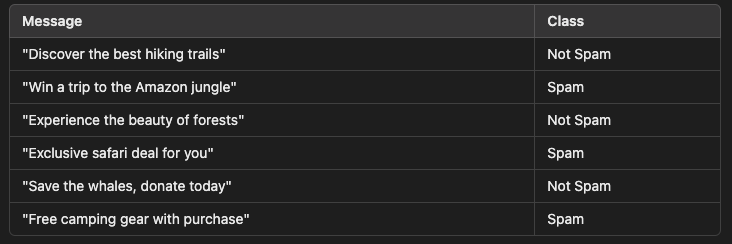

Create a list of unique words (a.k.a bag of words)

In [ ]:
unique_words = ['discover', 'the', 'best', 'hiking', 'trails', 'win', 'a', 'trip', 'to',
                'amazon', 'jungle', 'experience', 'beauty', 'of', 'forests', 'exclusive',
                'safari', 'deal', 'for', 'you', 'save', 'whales', 'donate', 'today', 'free',
                'camping', 'gear', 'with', 'purchase']

In [ ]:
spam_words = ['win', 'a', 'trip', 'to', 'amazon', 'jungle', 'exclusive', 'safari', 'deal', 'for', 'you',
              'free', 'camping', 'gear', 'with', 'purchase']

In [ ]:
non_spam_words = ['discover', 'the', 'best', 'hiking', 'trails', 'experience', 'the', 'beauty',
                  'of', 'forests', 'save', 'the', 'whales', 'donate', 'today']

This is the formula of calculating the classification of a word

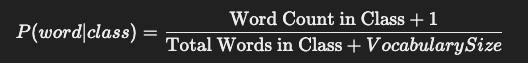

V is some constant that makes sure we never divide by 0. Something like epsilon, just smarter.

For example, I want to decide if the sentence "I love soccer" is positive or negative. This is how I do it

Calculate:
1. How many times does "I" appear in the positive class? Add one to it.
2. Divide section 1 by the total positive words + v * vocabulary size.
3. Do the same for negative class. How many times does love appear there, etc.
4. Now perhaps u got very small numbers. Normalize it by taking each probability  and diving it by the sum of the two probabilities.
5. Now u get real probabilities. The highest wins.

Real Example using this table:

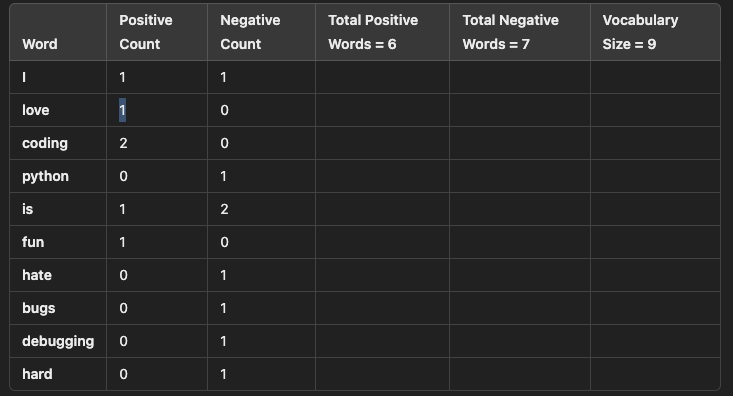

Classifying the sentence: debugging is hard

$$ P(soccer \mid class) $$

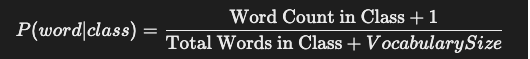

In [6]:
v = 1 # so we dont divide by 0
num_times_soccer_appeared_in_positive_class = 0
nominator = num_times_soccer_appeared_in_positive_class + v
nominator

1

In [7]:
total_words_in_positive = 6
vocab_size = 9
v = 1
denominator = total_words_in_positive + v * vocab_size
denominator

15

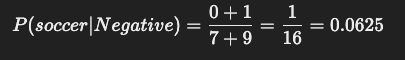

Do this for all words, and you get the probabilities.

In [8]:
text = ["I", "love", "coding", "python", "is", "fun", "hate", "bugs", "debugging", "hard"]

In [9]:
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(text)
X_test_vectors = vectorizer.transform(text)

In [10]:
classifier = MultinomialNB()
classifier.fit(X_train_vectors, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [10, 1600]

In [11]:
y_pred = classifier.predict(X_test_vectors)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

NotFittedError: This MultinomialNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [12]:
documents = [
    "I love coding",     
    "coding is fun", 
    "I hate bugs",       
    "debugging is hard", 
]
labels = ["Positive", "Positive", "Negative", "Negative"]

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(documents)

model = MultinomialNB()
model.fit(X_train, labels)

test_sentence = ["I love soccer"]
X_test = vectorizer.transform(test_sentence)
predicted_class = model.predict(X_test)[0]

print(f"The sentence '{test_sentence[0]}' is predicted to be: {predicted_class}")

The sentence 'I love soccer' is predicted to be: Positive


# Naive Bayes for Sentiment Analysis in NLP


In this notebook, we will learn how to classify text data using the Naive Bayes algorithm. 
Specifically, we will perform sentiment analysis on a small dataset of movie reviews.

### Objectives
1. Understand Naive Bayes and how it works.
2. Perform text preprocessing.
3. Train a Naive Bayes classifier on a dataset of reviews.
4. Predict sentiment for new reviews.
    

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline    

## Dataset

In [ ]:
reviews = [
    "I love this movie",
    "I hate this movie",
    "This movie is great",
    "This movie is bad"
]
labels = ["Positive", "Negative", "Positive", "Negative"]

df = pd.DataFrame({"Review": reviews, "Sentiment": labels})
df    


## Preprocessing Text

Naive Bayes requires numeric input. We will use **CountVectorizer** to convert text into a Bag of Words representation.

### What is Bag of Words (BoW)?
BoW represents text by counting word occurrences. For example:
- Review: "I love this movie"
- Vocabulary: ["I", "love", "this", "movie", "hate", "is", "great", "bad"]
- Vector: [1, 1, 1, 1, 0, 0, 0, 0]
    

## Training a Naive Bayes Classifier

In [ ]:

# Build the Naive Bayes pipeline
model = Pipeline([
    ('vectorizer', CountVectorizer()),  # Convert text to Bag of Words
    ('classifier', MultinomialNB())    # Train Naive Bayes classifier
])

# Train the model
model.fit(reviews, labels)
    

## Making Predictions

In [ ]:

# Test the model
new_review = ["I love this movie"]
prediction = model.predict(new_review)

print(f"Review: {new_review[0]}")
print(f"Predicted Sentiment: {prediction[0]}")
    

## Evaluate the Model

In [ ]:

# Predict training data
train_predictions = model.predict(reviews)

# Compare predictions with actual labels
df['Predicted Sentiment'] = train_predictions
df
    


## Key Takeaways

1. Naive Bayes is a simple but effective algorithm for text classification.
2. It assumes independence between features, which is rarely true but works well in practice.
3. Preprocessing text data (like tokenization and Bag of Words) is essential for working with text.
    

## Naive Babyes With Tf-IDF

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Training data
documents = [
    "I love coding",      # Positive
    "coding is fun",      # Positive
    "I hate bugs",        # Negative
    "debugging is hard",  # Negative
]
labels = ["Positive", "Positive", "Negative", "Negative"]

# Vectorize the data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(documents)

# Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train, labels)

# Predict the class for "I love soccer"
test_sentence = ["I love soccer"]
X_test = vectorizer.transform(test_sentence)
predicted_class = model.predict(X_test)[0]

# Show prediction
print(f"The sentence '{test_sentence[0]}' is predicted to be: {predicted_class}")


The sentence 'I love soccer' is predicted to be: Positive
